In [1]:
import pandas as pd
import geopandas as gpd 
import numpy as np

import matplotlib.pyplot as plt
from shapely.geometry import Point

import altair as alt

In [2]:
traf_crash_df = pd.read_csv('traffic_crashes.csv')
# traf_crash_df.head(5)
# Create the dataset into geo dataframe using latitude and longitude columns
geometry = [Point(xy) for xy in zip(traf_crash_df['LONGITUDE'], traf_crash_df['LATITUDE'])]
crash_gdf = gpd.GeoDataFrame(traf_crash_df, geometry=geometry, crs=4326)
# crash_gdf.head(5)
# filter the geo df to only use pedestrian related incidents
crash_gdf = crash_gdf[(crash_gdf['FIRST_CRASH_TYPE'] == 'PEDESTRIAN') | (crash_gdf['FIRST_CRASH_TYPE'] == 'PEDALCYCLIST')]
crash_gdf.head(5)

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,geometry
6,088061d9b7e5ab5b1353517ebefcadca065c20de8ca860...,N,03/15/2025 02:12:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,UNKNOWN,UNKNOWN,PEDALCYCLIST,FOUR WAY,...,0.0,2.0,0.0,14,7,3,41.871778,-87.625789,POINT (-87.625789124419 41.871778332743),POINT (-87.62579 41.87178)
53,2f3c202a917ab73f0de69b2f2bb0e95807e0afd7db8704...,NaN,03/15/2025 02:15:00 PM,30,UNKNOWN,UNKNOWN,CLEAR,DAYLIGHT,PEDALCYCLIST,UNKNOWN,...,0.0,2.0,0.0,14,7,3,41.880565,-87.649361,POINT (-87.649361418191 41.880565045499),POINT (-87.64936 41.88057)
65,57feb475a9f4253d7cb02b1168dbdb9aed4895e29faf0c...,NaN,11/04/2024 02:46:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PEDALCYCLIST,ONE-WAY,...,0.0,1.0,0.0,14,2,11,41.891621,-87.624254,POINT (-87.624253929022 41.891621161011),POINT (-87.62425 41.89162)
116,542a4b3001422e80e685d2486fa17924bb374f380dc45e...,NaN,03/15/2025 11:51:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,...,0.0,1.0,0.0,11,7,3,41.917698,-87.682372,POINT (-87.682371991359 41.917698146237),POINT (-87.68237 41.9177)
135,441a53d130fc1d01d7aaab8a0762e522464b9e421ec9d2...,NaN,09/22/2023 03:38:00 PM,5,UNKNOWN,UNKNOWN,CLEAR,DAYLIGHT,PEDESTRIAN,PARKING LOT,...,0.0,1.0,0.0,15,6,9,41.864521,-87.639304,POINT (-87.639304099636 41.864521193744),POINT (-87.6393 41.86452)


In [19]:
speed_cameras_df = pd.read_csv('speed_camera_violations.csv')
# speed_cameras_df[['LATITUDE', 'LONGITUDE']].isna().mean()
# speed_cameras_df.head(5)
speed_cameras_df = speed_cameras_df.dropna(subset=['LATITUDE', 'LONGITUDE'])
# speed_cameras_df.head(5)
geometry = [Point(xy) for xy in zip(speed_cameras_df['LONGITUDE'], speed_cameras_df['LATITUDE'])]
cameras_gdf = gpd.GeoDataFrame(speed_cameras_df, geometry=geometry, crs=4326)
cameras_gdf

,ADDRESS,CAMERA ID,VIOLATION DATE,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION,geometry
14146,57 E 95TH,CHI035,02/29/2024,18,1.178587e+06,1.841967e+06,41.721657,-87.621463,"(41.72165713317433, -87.62146289865515)",POINT (-87.62146 41.72166)
14147,1754 N PULASKI RD,CHI157,12/01/2018,8,1.149395e+06,1.911608e+06,41.913375,-87.726589,"(41.91337483050126, -87.72658859994081)",POINT (-87.72659 41.91337)
14148,4620 W BELMONT AVE,CHI086,11/21/2018,8,1.144831e+06,1.920910e+06,41.938988,-87.743121,"(41.938988390759555, -87.74312142256439)",POINT (-87.74312 41.93899)
14149,3809 W BELMONT AVE,CHI088,01/27/2017,3,1.150401e+06,1.920968e+06,41.939040,-87.722646,"(41.939040255975605, -87.72264591078833)",POINT (-87.72265 41.93904)
14150,3851 W 79th,CHI073,03/14/2019,1,1.151859e+06,1.851860e+06,41.749371,-87.719105,"(41.74937090787529, -87.71910467544157)",POINT (-87.7191 41.74937)
...,...,...,...,...,...,...,...,...,...,...
408256,10318 S INDIANAPOLIS,CHI120,09/12/2024,132,1.203645e+06,1.837056e+06,41.707577,-87.529848,"(41.70757690291348, -87.52984826112849)",POINT (-87.52985 41.70758)
408257,10318 S INDIANAPOLIS,CHI120,01/18/2017,55,1.203645e+06,1.837056e+06,41.707577,-87.529848,"(41.70757690291348, -87.52984826112849)",POINT (-87.52985 41.70758)
408258,10318 S INDIANAPOLIS,CHI120,05/24/2017,62,1.203645e+06,1.837056e+06,41.707577,-87.529848,"(41.70757690291348, -87.52984826112849)",POINT (-87.52985 41.70758)
408259,10318 S INDIANAPOLIS,CHI120,07/30/2018,134,1.203645e+06,1.837056e+06,41.707577,-87.529848,"(41.70757690291348, -87.52984826112849)",POINT (-87.52985 41.70758)


In [12]:
# Read and display the chicago neighborhood geojson file
chicago_gdf = gpd.read_file('chicago.geojson')
chicago_gdf

,objectid,shape_area,shape_len,zip,geometry
0,33,106052287.488,42720.0444058,60647,"MULTIPOLYGON (((-87.67762 41.91776, -87.67761 ..."
1,34,127476050.762,48103.7827213,60639,"MULTIPOLYGON (((-87.72683 41.92265, -87.72693 ..."
2,35,45069038.4783,27288.6096123,60707,"MULTIPOLYGON (((-87.785 41.90915, -87.78531 41..."
3,36,70853834.3797,42527.9896789,60622,"MULTIPOLYGON (((-87.66707 41.88885, -87.66707 ..."
4,37,99039621.2518,47970.1401531,60651,"MULTIPOLYGON (((-87.70656 41.89555, -87.70672 ..."
...,...,...,...,...,...
56,57,155285532.005,53406.9156168,60623,"MULTIPOLYGON (((-87.69479 41.83008, -87.69486 ..."
57,58,211114779.439,58701.3253749,60629,"MULTIPOLYGON (((-87.68306 41.75786, -87.68306 ..."
58,59,211696050.967,58466.1602979,60620,"MULTIPOLYGON (((-87.62373 41.72167, -87.62388 ..."
59,60,125424284.172,52377.8545408,60637,"MULTIPOLYGON (((-87.57691 41.79511, -87.577 41..."


In [13]:
# Joining the crashes dataset with the chicago neighborhood geojson file
chi_crashes_gdf = gpd.sjoin(crash_gdf, chicago_gdf, predicate='within')

Text(0.5, 1.0, 'Overlay of Pedestrian Related Accidents & Speed Camera Locations in Chicago')

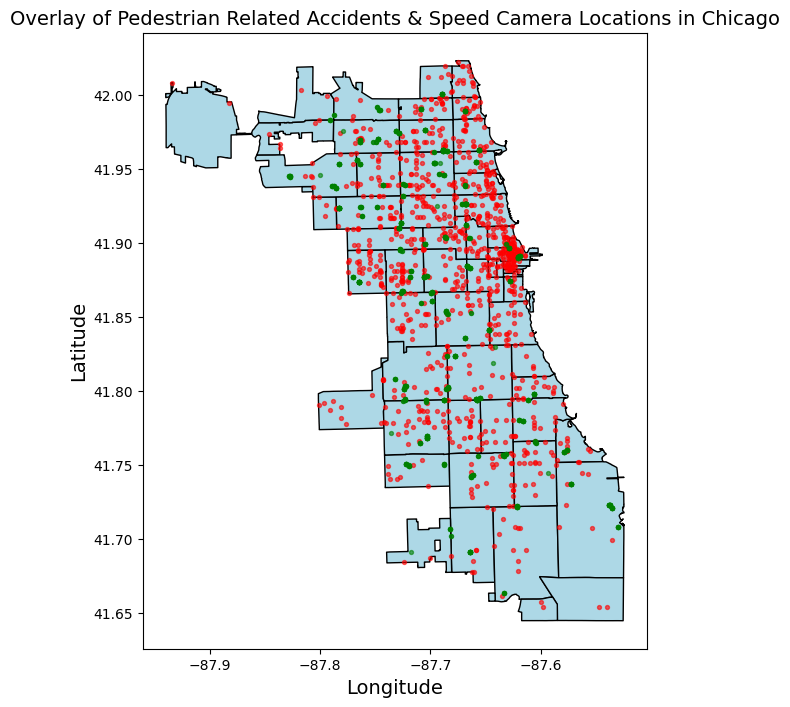

In [22]:
fig, ax = plt.subplots(figsize=(12, 8))
# Plot the Chicago neighborhoods
chicago_gdf.plot(ax=ax, color='lightblue', edgecolor='black')

# Plot the pedestrian crash location onto the map
chi_crashes_gdf.sample(1000).plot(ax=ax, color='red', alpha=0.6, markersize=8)
# Plot the camera locations onto the map
cameras_gdf.sample(1000).plot(ax=ax, color='green', alpha=0.6, markersize=8)

# Add labels and title
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)
ax.set_title("Overlay of Pedestrian Related Accidents & Speed Camera Locations in Chicago", fontsize=14)

In [61]:
from scipy.spatial import cKDTree
import numpy as np

# Drop nan values from crashes and cameras and reset geometry columns to reflect dropped values
gdf_crashes = crash_gdf.dropna(subset=['LATITUDE', 'LONGITUDE'])
gdf_crashes = gdf_crashes.set_geometry(gpd.GeoSeries.from_xy(gdf_crashes.LONGITUDE, gdf_crashes.LATITUDE))

gdf_cameras = cameras_gdf.dropna(subset=['LATITUDE', 'LONGITUDE'])
gdf_cameras = gdf_cameras.set_geometry(gpd.GeoSeries.from_xy(gdf_cameras.LONGITUDE, gdf_cameras.LATITUDE))

# Reproject gdfs into coordinate system fit for meters computations in Illinois
gdf_crashes = gdf_crashes.to_crs(epsg=3435)
gdf_cameras = gdf_cameras.to_crs(epsg=3435)

# Extract arrays of camera and crash locations:
# vstack takes the longitude and latitude columns (x and y from geometry) and stacks
# them on top of each other vertically, and .T transposes this matrix so it goes from
# [2, n] ->  [n, 2], meaning we now have n rows, and each row contains longitude and latitude
# values (x and y coordinates). This is needed as the KDTree expects input to be [x, y]
camera_coords = np.vstack([gdf_cameras.geometry.x, gdf_cameras.geometry.y]).T
crash_coords = np.vstack([gdf_crashes.geometry.x, gdf_crashes.geometry.y]).T

# Ensure we only build and query for points that are valid (no nan's)
    # - np.isfinite(some_array): will return a boolean for each entry in the array
    # marking whether it is a valid value or not.

    # - np.all(array, axis=1): will check that for each row in the array, all the
    # columns contain valid values, so in our case, it will check if both x and y
    # are finite values.

    # array = array[np.all(...)]: this ensures that our 2 arrays (camera and crash coords)
    # only contain rows that have both x and y values as finite (no nan's), as this is needed
    # for the KDTree. 
camera_coords = camera_coords[np.all(np.isfinite(camera_coords), axis=1)]
crash_coords = crash_coords[np.all(np.isfinite(crash_coords), axis=1)]

# Build KDTree for the speed cameras
camera_tree = cKDTree(camera_coords)

# Query nearest camera for each crash
    # For each pedestrian / pedalcyclist crash, we will ask our KDTree, "how close is
    # the nearest speed camera to this crash in meters?"
distances, _ = camera_tree.query(crash_coords, k=1)

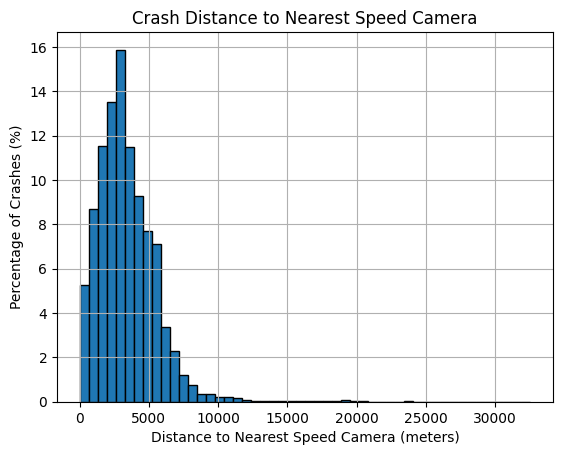

In [ ]:
# create 50 equally spaced bins based on the distances computed from KDTree queries
counts, bin_edges = np.histogram(distances, bins=50)

# Convert counts to percentages for interpretability on the histogram
# so we know the % of crashes for each bin
percentages = (counts / counts.sum()) * 100

# Plot the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Plot the data and label axes
plt.bar(bin_centers, percentages, width=(bin_edges[1] - bin_edges[0]), edgecolor='black')
plt.xlabel('Distance to Nearest Speed Camera (meters)')
plt.ylabel('Percentage of Crashes (%)')
plt.title('Pedestrian Crash Distance to Nearest Speed Camera')
plt.grid(True)
plt.show()